In [6]:
import pandas
import numpy
import seaborn

from scipy import stats
from matplotlib import pyplot

from src.api.data import LoadDataStore

In [7]:
df = LoadDataStore.get_raw(var_set_type=1)

### Continuous vs Categorical

loan_amnt : Annova: Significant | T test: Significant | default_ind Mean 0 (14755.5) | Mean 1 (14573.0) | Difference in means (182.5)


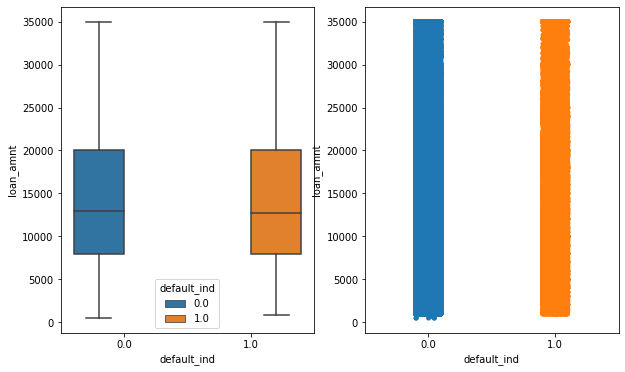

int_rate : Annova: Significant | T test: Significant | default_ind Mean 0 (13.0) | Mean 1 (16.0) | Difference in means (3.0)


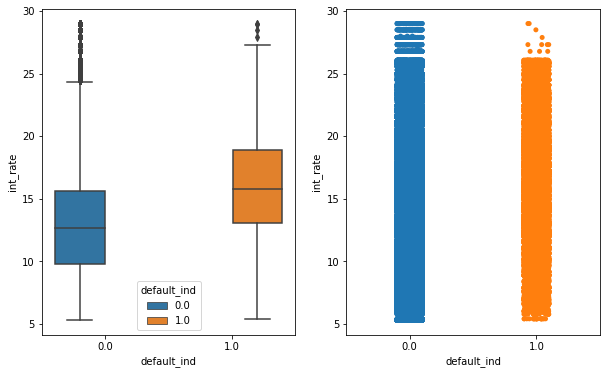

funded_amnt : Annova: Significant | T test: Significant | default_ind Mean 0 (14744.1) | Mean 1 (14528.7) | Difference in means (215.4)


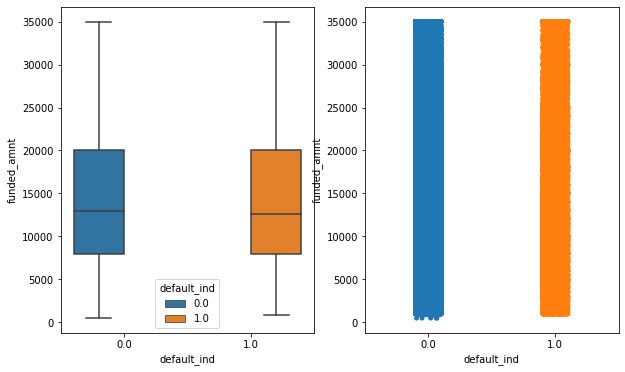

annual_inc : Annova: Significant | T test: Significant | default_ind Mean 0 (75641.9) | Mean 1 (65128.9) | Difference in means (10513.0)


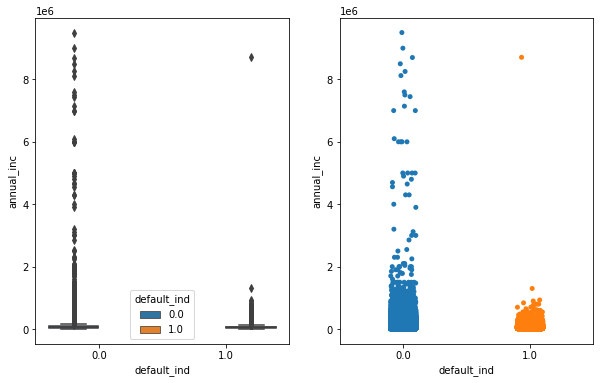

installment : Annova: Significant | T test: Significant | default_ind Mean 0 (436.0) | Mean 1 (441.1) | Difference in means (5.1)


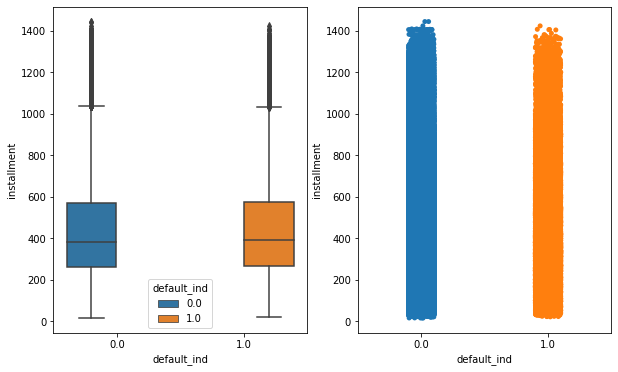

out_prncp : Annova: Significant | T test: Significant | default_ind Mean 0 (8742.9) | Mean 1 (304.2) | Difference in means (8438.8)


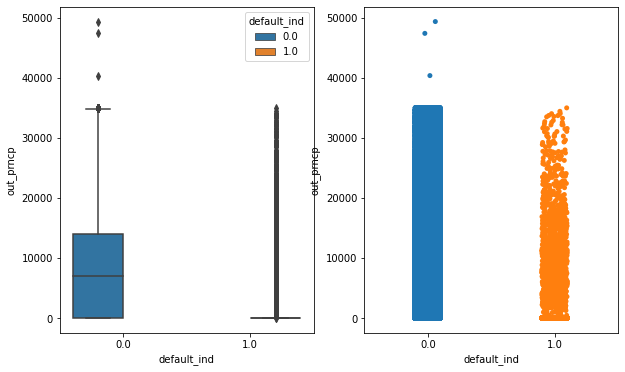

out_prncp_inv : Annova: Significant | T test: Significant | default_ind Mean 0 (8739.4) | Mean 1 (304.1) | Difference in means (8435.3)


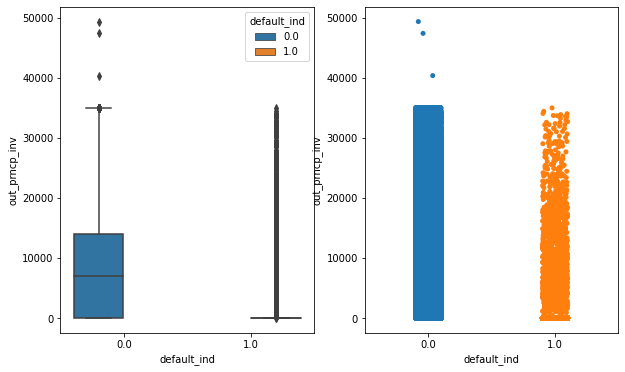

total_pymnt : Annova: Significant | T test: Significant | default_ind Mean 0 (7727.6) | Mean 1 (6358.6) | Difference in means (1369.1)


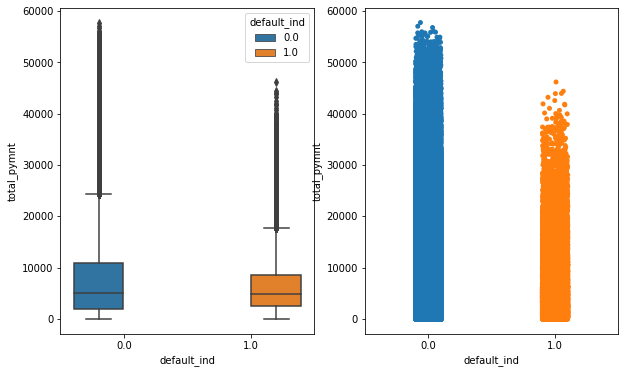

total_pymnt_inv : Annova: Significant | T test: Significant | default_ind Mean 0 (7698.2) | Mean 1 (6298.1) | Difference in means (1400.1)


In [8]:
vars = ["loan_amnt", "int_rate", "funded_amnt", "annual_inc", "installment", 
        "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv"]
dep_var = "default_ind"

for var in vars:
    grp_0 = df[var][df[dep_var] == 0]
    grp_1 = df[var][df[dep_var] == 1]
    
    ttest_p_value = stats.ttest_ind(grp_0, grp_1).pvalue
    annova_p_value = stats.f_oneway(grp_0, grp_1).pvalue
    mean_by_grp = df[[var, dep_var]].groupby(dep_var).mean()[var]
    
    annova_sig_str = "Significant" if annova_p_value < 0.05 else "Not Significant"
    ttest_sig_str = "Significant" if ttest_p_value < 0.05 else "Not Significant"
    
    title = f"""{var} : Annova: {annova_sig_str} | T test: {ttest_sig_str} | {dep_var} Mean 0 ({round(mean_by_grp[0], 1)}) | Mean 1 ({round(mean_by_grp[1], 1)}) | Difference in means ({round(abs(mean_by_grp[0] - mean_by_grp[1]), 1)})"""
    
    fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(10, 6))
    print(title)
    seaborn.boxplot(y=var, x=dep_var, hue=dep_var, data=df, ax=ax[0])
    seaborn.stripplot(y=var, x=dep_var, data=df, ax=ax[1])
    pyplot.show()

### Categorical vs Categorical

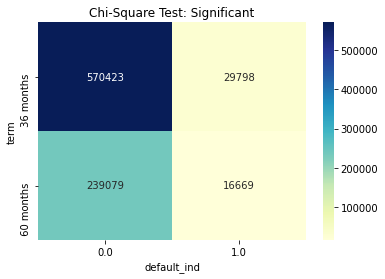

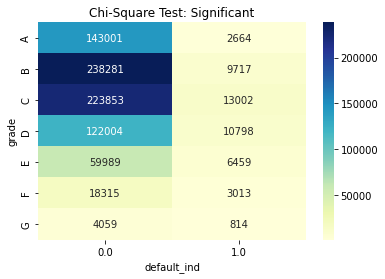

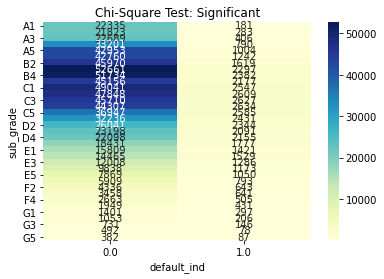

In [9]:
vars = ["term", "grade", "sub_grade", "verification_status", "application_type"]
dep_var = "default_ind"

for var in vars:
    cross_tab = pandas.crosstab(df[var], df[dep_var])
    chi2, chi_prob, dof, ex = stats.chi2_contingency(cross_tab)
    sig_str = "Significant" if chi_prob < 0.05 else "Not Significant"
    title = f"Chi-Square Test: {sig_str}"
    seaborn.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt='g').set_title(title)
    pyplot.show()

### Defaulter Percentage by Category

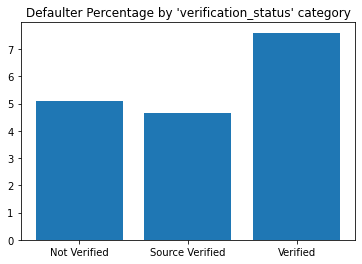

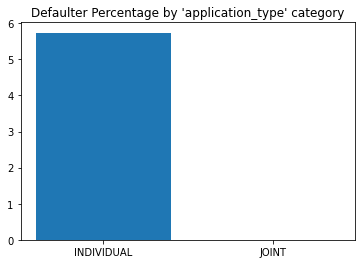

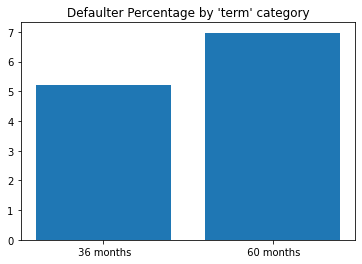

In [10]:
ind_var = "default_ind"

for var in ["grade", "verification_status", "application_type", "term"]:
    series_for_grp0 = df[var][df[ind_var] == 0]
    series_for_grp1 = df[var][df[ind_var] == 1]

    var_s = [x for x in df[var].unique()]
    var_s.sort()

    pct_defaulters_by_series = dict()

    for x in var_s:
        cnt_grp0 = len(series_for_grp0[series_for_grp0 == x])
        cnt_grp1 = len(series_for_grp1[series_for_grp1 == x])
        default_pct = round(cnt_grp1 / cnt_grp0 * 100, 2)
        pct_defaulters_by_series[x] = default_pct

    pyplot.bar(pct_defaulters_by_series.keys(), pct_defaulters_by_series.values())
    pyplot.title(f"Defaulter Percentage by '{var}' category")
    pyplot.show()